In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
#pull stock data
data = yf.download("AAPL", start="2014-01-01", end="2019-09-30")
#sample of stock data
data.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,79.38,79.58,78.86,79.02,71.32,58671200
2014-01-03,78.98,79.10,77.20,77.28,69.75,98116900
2014-01-06,76.78,78.11,76.23,77.70,70.13,103152700
2014-01-07,77.76,77.99,76.85,77.15,69.63,79302300
2014-01-08,76.97,77.94,76.96,77.64,70.07,64632400


In [2]:
from sklearn.preprocessing import MinMaxScaler
#Spliting data into train and test
#removing all rows if any of the feature is Nan
#Scaling using min-max
#removing features that are not needed
# data_train = data_train.drop('Close', 1)
def train_test(data):
    data.isna().any()
    sc = MinMaxScaler(feature_range = (0, 1))
    
    data_train = data.loc['2014-01-01':'2018-12-31']
    
    
    data_test = data.loc['2019-01-01':]
    
#     data_train_y = data_train['Close']
#     data_train = data_train.drop('Close', 1)
#     data_train = data_train.drop('Adj Close', 1)

    
#     data_train = sc.fit_transform(data_train)
# #     data_train_y = sc.fit_transform(data_train_y.values.reshape(1,-1))
#     data_test_y = data_test['Close']
#     data_test = data_test.drop('Close', 1)
# #     data_test = data_test.drop('Adj Close', 1)
#     data_test = sc.fit_transform(data_test)
# #     data_test_y = sc.fit_transform(data_test_y.values.reshape(1,-1))

    
# #     data_test = sc.fit_transform(data_test)

    training_set_scaled = sc.fit_transform(data_train)
    
    # Creating a data structure with 60 timesteps and 1 output for training
    X_train = []
    y_train = []
    for i in range(60, 1258):
        X_train.append(training_set_scaled[i-60:i, 3])
        y_train.append(training_set_scaled[i, 3])
    X_train, y_train = np.array(X_train), np.array(y_train)

    test_set_scaled = sc.fit_transform(data_test)
    
    # Creating a data structure with 60 timesteps and 1 output for testing
    X_test = []
    y_test = []
    for i in range(60, 180):
        X_test.append(test_set_scaled[i-60:i, 3])
        y_test.append(test_set_scaled[i, 3])
        
        
    X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

    
    return X_train, y_train, X_test, y_test, sc


In [3]:
X_train, y_train, X_test, y_test, sc = train_test(data)

In [4]:
print(X_train[0])

[0.0474264  0.03659675 0.0392108  0.03578764 0.03883737 0.03267567
 0.02943922 0.0319288  0.04145142 0.05116076 0.04842223 0.03634779
 0.04381652 0.0459949  0.05010269 0.04114023 0.04506131 0.00597498
 0.00087135 0.         0.00068463 0.00155598 0.00796664 0.01138981
 0.01132757 0.01767598 0.02595382 0.03217776 0.03211552 0.03970872
 0.03927304 0.04107799 0.03342254 0.02788324 0.02265513 0.02464679
 0.01979212 0.01562208 0.02477127 0.02352648 0.02483351 0.02794548
 0.02894131 0.0275098  0.02726085 0.02769652 0.03224    0.03273791
 0.02744756 0.02215722 0.02396216 0.02806996 0.02794548 0.02570486
 0.02937698 0.03504077 0.04020663 0.03553868 0.03348478 0.03292463]


In [5]:
print(y_train)

[0.03286239 0.03721914 0.03802826 ... 0.52747868 0.5279766  0.53737474]


In [16]:
#creating basic MLP using TensorFlow

import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(59, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer='adagrad', loss="mean_squared_error")

In [17]:
#fitting the model
model.fit(X_train,y_train,epochs = 100)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 1s 606us/sample - loss: 0.0069
Epoch 2/100
1198/1198 [==============================] - 0s 52us/sample - loss: 0.0012
Epoch 3/100
1198/1198 [==============================] - 0s 55us/sample - loss: 8.1259e-04
Epoch 4/100
1198/1198 [==============================] - 0s 52us/sample - loss: 7.8722e-04
Epoch 5/100
1198/1198 [==============================] - 0s 53us/sample - loss: 7.3880e-04
Epoch 6/100
1198/1198 [==============================] - 0s 60us/sample - loss: 6.2595e-04
Epoch 7/100
1198/1198 [==============================] - 0s 59us/sample - loss: 5.8757e-04
Epoch 8/100
1198/1198 [==============================] - 0s 53us/sample - loss: 6.2272e-04
Epoch 9/100
1198/1198 [==============================] - 0s 57us/sample - loss: 5.6967e-04
Epoch 10/100
1198/1198 [==============================] - 0s 49us/sample - loss: 5.3711e-04
Epoch 11/100
1198/1198 [==============================] - 0s 51us/sample -

In [26]:
#model evaluation based on loss
model.evaluate(X_test, y_test )
y_pred = model.predict(X_test)

120/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

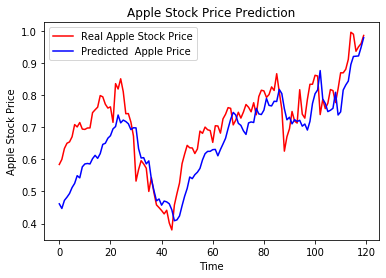

In [19]:
#Plotting pedicted vs actual price to see if trend is captured
import matplotlib.pyplot as plt

plt.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted  Apple Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [43]:
# model1 = tf.keras.Sequential()
# model1.add(tf.keras.layers.LSTM(20, input_shape=(data_train.shape[1], 1), return_sequences=True))
# model1.add(tf.keras.layers.LSTM(20))
# model1.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))
# model1.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))



# model1.compile(optimizer="adam", loss="mean_squared_error")

# model1.input_shape



# Initialising the RNN
regressor = tf.keras.Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(tf.keras.layers.Dropout(0.25))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.25))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.25))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.25))

# Adding a fifth LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.25))

# Adding a sixth LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 50))
regressor.add(tf.keras.layers.Dropout(0.25))

# Adding the output layer
regressor.add(tf.keras.layers.Dense(units = 1))


# Compiling the RNN
opt = tf.optimizers.Adam(learning_rate=0.1)
regressor.compile(optimizer = opt, loss = 'mean_squared_error')

In [44]:
X_train_re = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [45]:
regressor.fit(X_train_re, y_train, epochs=100,batch_size = 32)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 28s 23ms/sample - loss: 1.1945
Epoch 2/100
1198/1198 [==============================] - 9s 8ms/sample - loss: 0.0597
Epoch 3/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0596
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0575
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0561
Epoch 6/100
1198/1198 [==============================] - 13s 11ms/sample - loss: 0.0542
Epoch 7/100
1198/1198 [==============================] - 13s 11ms/sample - loss: 0.0541
Epoch 8/100
1198/1198 [==============================] - 14s 12ms/sample - loss: 0.0541
Epoch 9/100
1198/1198 [==============================] - 11s 9ms/sample - loss: 0.0564
Epoch 10/100
1198/1198 [==============================] - 12s 10ms/sample - loss: 0.0561
Epoch 11/100
1198/1198 [==============================] - 9s 7ms/sample - loss: 0.0543
Epoch 12/100
1198/1

In [49]:
X_test_re = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [50]:
regressor.evaluate(X_test_re, y_test)
# print(sc)
yY_pred = regressor.predict(X_test_re)
# yY_pred = sc.inverse_transform(yY_pred)
# y_pred = sc.inverse_transform(y_pred)
# y_test = sc.inverse_transform(y_test)


120/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

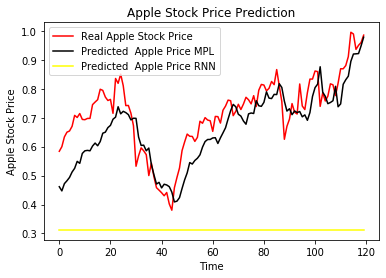

In [51]:
#Plotting predicted vs actual price to see if trend is captured

import matplotlib.pyplot as plt

plt.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
plt.plot(y_pred, color = 'black', label = 'Predicted  Apple Price MPL')
plt.plot(yY_pred, color = 'yellow', label = 'Predicted  Apple Price RNN')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()